<table align="left">
  <td>
    <a href="https://github.com/hussain0048/Machine-Learning/blob/master/Feature%20Selection/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>

# **Introduction**

Scikit learn is a very commonly used library for various machine learning algorithms. Once we are done with training machine learning algorithms, we need the right way to visualize results as well as the performance of the algorithm. We need to visualize various metrics to understand results better and hence performance of the algorithm. Matplotlib is a very commonly used data visualization library for plotting results of ML algorithms. But plotting with matplotlib requires a quite a learning curve to plot ML algorithms results. Also, one minor mistake when implementing visualizations can result in interpreting results totally wrong way. This can even slow down the process of testing various algorithms if data scientist is involved in getting visualizations right. In short, it can even slow data scientist and whole train-test process.

But what if you have a library that is ready-made for plotting results of machine learning algorithms?

It'll fasten your whole process a lot and you won't have to get into getting visualizations right. You also don't need to worry about its styling as well. The data scientist can then peacefully concentrate on his/her machine learning algorithms performance and try many different experiments.

Python has a library called **Scikit-Plot** which provides visualizations for many machine learning metrics related to regression, classification, and clustering. Scikit-Plot is built on top of matplotlib. So if you have some background on matplotlib then you can build on top of scikit-plot plots as well.

Scikit-plot has 4 main modules which are used for different visualizations as described below.



- estimators - It has methods for plotting the performance of various machine learning algorithms.
- metrics - It has methods for plotting various machine learning metrics like confusion matrix, ROC AUC curves, precision-recall curves, etc.
- cluster - It currently has one method for plotting elbow method plot for clustering to find out the best number of clusters for data.
- decomposition - It has methods for plotting results of PCA decomposition.

As a part of this tutorial, we'll be explaining the usage of scikit-plot API for interpreting ML algorithms results.

We'll start by importing the necessary libraries for our tutorial.

# **Importing the necessary libraries**

In [2]:
!pip install scikit-plot

In [3]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import sys
import warnings
warnings.filterwarnings("ignore")

print("Scikit Plot Version : ", skplt.__version__)
print("Scikit Learn Version : ", sklearn.__version__)
print("Python Version : ", sys.version)

%matplotlib inline

Scikit Plot Version :  0.3.7
Scikit Learn Version :  0.22.2.post1
Python Version :  3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


# **1.Load Datasets**

We'll be loading three different datasets which we'll be using to train various machine learning models. We'll then visualize the results of these models

## **1.1 Digits Dataset**

The first dataset that we'll load is digits dataset which is 8x8 images of numbers. It's readily available in scikit-learn for our usage.

We'll then divide the dataset into the train (80%) and test sets(20%).

In [4]:
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target

print("Digits Dataset Size : ", X_digits.shape, Y_digits.shape)

Digits Dataset Size :  (1797, 64) (1797,)


In [5]:
X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits,
                                                                                train_size=0.8,
                                                                                stratify=Y_digits,
                                                                                random_state=1)

print("Digits Train/Test Sizes : ",X_digits_train.shape, X_digits_test.shape, Y_digits_train.shape, Y_digits_test.shape)

Digits Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


## **1.2 Malignant/Benign Tumor Dataset**


The second dataset that we'll use if a cancer dataset which has information about the malignant and benign tumor. It's also readily available in scikit-learn for our use.

We'll divide it as well in train (80%) and test sets (20%). We have also printed features available with the dataset.

In [6]:
cancer = load_breast_cancer()
X_cancer, Y_cancer = cancer.data, cancer.target

print("Feautre Names : ", cancer.feature_names)
print("Cancer Dataset Size : ", X_cancer.shape, Y_cancer.shape)

Feautre Names :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Cancer Dataset Size :  (569, 30) (569,)


In [7]:
X_cancer_train, X_cancer_test, Y_cancer_train, Y_cancer_test = train_test_split(X_cancer, Y_cancer,
                                                                                train_size=0.8,
                                                                                stratify=Y_cancer,
                                                                                random_state=1)

print("Cancer Train/Test Sizes : ",X_cancer_train.shape, X_cancer_test.shape, Y_cancer_train.shape, Y_cancer_test.shape)

Cancer Train/Test Sizes :  (455, 30) (114, 30) (455,) (114,)


## **1.3 Boston Housing Price Dataset**


The third dataset that we'll use is the Boston housing price dataset. It has information about various houses of Boston and the price at which they were sold. We'll divide it as well in train and test sets with the same proportion as above mentioned datasets.

In [8]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target

print("Boston Dataset Size : ", X_boston.shape, Y_boston.shape)

print("Boston Dataset Features : ", boston.feature_names)

Boston Dataset Size :  (506, 13) (506,)
Boston Dataset Features :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
X_boston_train, X_boston_test, Y_boston_train, Y_boston_test = train_test_split(X_boston, Y_boston,
                                                                                train_size=0.8,
                                                                                random_state=1)

print("Boston Train/Test Sizes : ",X_boston_train.shape, X_boston_test.shape, Y_boston_train.shape, Y_boston_test.shape)


Boston Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


# **2. Estimator Performance**


The module that we'll be exploring is the estimators module. We'll be plotting various plots after training ML models.



## **2.1 Cross Validation Performance Plot**

We can plot the cross-validation performance of models by passing it whole dataset. Scikit-plot provides a method named plot_learning_curve() as a part of the estimators module which accepts estimator, X, Y, cross-validation info, and scoring metric for plotting performance of cross-validation on the dataset.

Below we are plotting the performance of logistic regression on digits dataset with cross-validation.

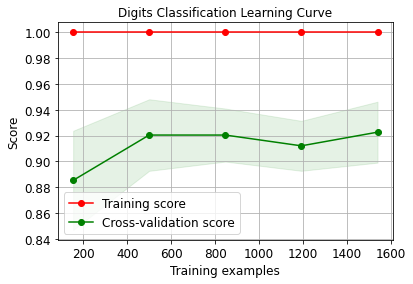

In [10]:
skplt.estimators.plot_learning_curve(LogisticRegression(), X_digits, Y_digits,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve");

Below we are plotting the performance of linear regression on the Boston dataset with cross-validation.



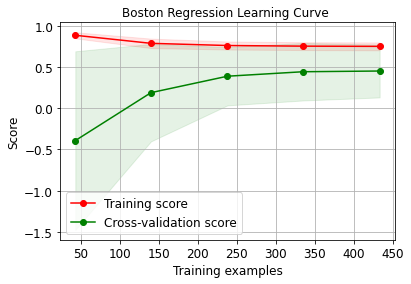

In [11]:
skplt.estimators.plot_learning_curve(LinearRegression(), X_boston, Y_boston,
                                     cv=7, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Boston Regression Learning Curve ");

We can use many other scoring metrics for plotting purposes. Below is a list of scoring metrics available with scikit-learn.



In [12]:
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## **2.2 Feature Importance Plotting**


The second chart that we'll be plotting is a bar chart depicting the importance of features for various ML models. We'll first train random forest on the Boston dataset and gradient boosting on the cancer dataset. We'll then plot feature importance available from both models as a bar chart using plot_feature_importances() method of estimators module of scikit-plot.

In [17]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_boston_train, Y_boston_train)
rf_reg.score(X_boston_test, Y_boston_test)

0.9118032669942397

In [18]:
gb_classif = GradientBoostingClassifier()
gb_classif.fit(X_cancer_train, Y_cancer_train)
gb_classif.score(X_cancer_test, Y_cancer_test)

0.9649122807017544

Below we have a combined chart of both random forest and gradient boosting into one figure because scikit-plot is based on matplotlib and lets us include more details on graphs using matplotlib.

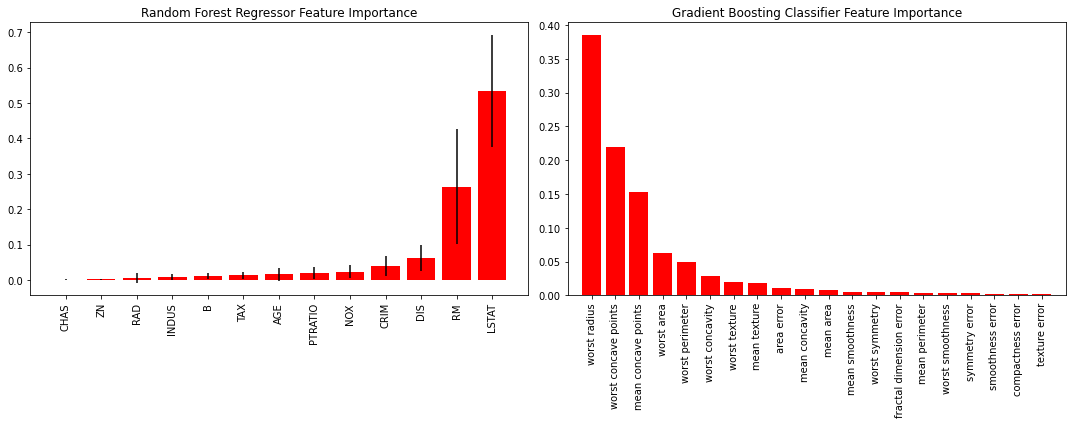

In [19]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rf_reg, feature_names=boston.feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(gb_classif, feature_names=cancer.feature_names,
                                         title="Gradient Boosting Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax2);

plt.tight_layout()

# **3. Machine Learning Metrics ¶**


We'll now explore various plotting methods available as a part of the metrics module of scikit-plot.

To start with it, we'll first train logistic regression on the digits dataset. We'll then use this trained model for various plotting methods.

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_digits_train, Y_digits_train)
log_reg.score(X_digits_test, Y_digits_test)

0.9583333333333334

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_cancer_train , Y_cancer_train)
DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
y_pred1 = DTC.predict(X_cancer_test)
dt=DTC.score(X_cancer_test, Y_cancer_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_cancer_test, Y_cancer_test)))

Accuracy score= 0.9298


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, thresholds = roc_curve(Y_cancer_test, y_pred1)
roc_auc = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_cancer_train , Y_cancer_train)
Ran_For

In [ ]:
y_pred1 = Ran_For.predict(X_cancer_test)
rn=Ran_For.score(X_cancer_test, Y_cancer_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_cancer_test, Y_cancer_test)))

In [ ]:
fpr_rf, tpr_rf, thresholds = roc_curve(Y_cancer_test, y_pred1)
roc_auc = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **3.1 Confusion Matrix**


The first metric that we'll plot is a confusion matrix. The confusion matrix let us analyze how our classification algorithm is doing for various classes of data.

Below we are plotting confusion matrix using plot_confusion_matrix() method of metrics module. We are plotting two confusion matrix where the second one has normalized its values before plotting.

We need to pass original values and predicted values in order to plot a confusion matrix.

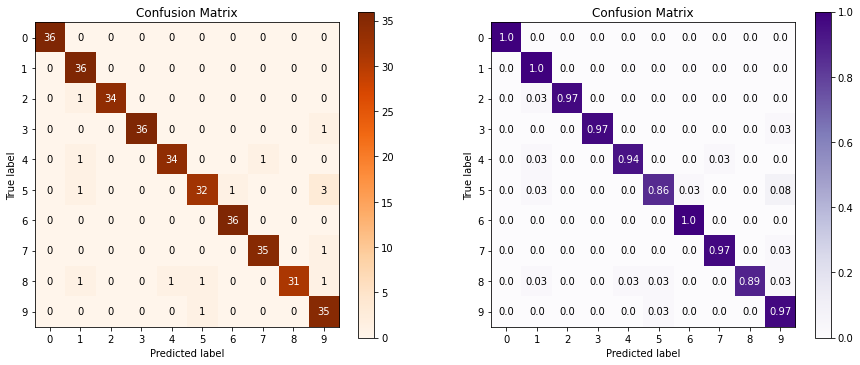

In [21]:
Y_test_pred = log_reg.predict(X_digits_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(Y_digits_test, Y_test_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(Y_digits_test, Y_test_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

## **3.2 ROC AUC Curve**


The second metric that we'll plot is the ROC AUC curve. Scikit-plot provides methods named plot_roc() and plot_roc_curve() as a part of metrics module for plotting roc AUC curves. We need to pass original values and predicted probability to methods in order to plot the ROC AUC plot for each class of classification dataset.

It also plots the dashed line which depicts the random guess model covering 50% area of ROC AUC curve.

We can notice from the below plot that the area covered by the ROC AUC curve line of each class is more than 95% which is good. We want a line of each class to cover more than 90% area so that we can be sure that our model is doing well predicting each class even in an imbalanced dataset situation.

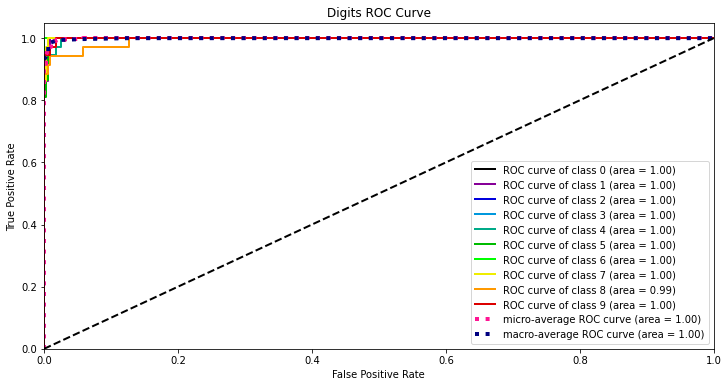

In [23]:
Y_test_probs = log_reg.predict_proba(X_digits_test)

skplt.metrics.plot_roc_curve(Y_digits_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(12,6));

In [ ]:
plt.plot(fpr_dt, tpr_dt, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_rf, tpr_rf, marker='*', label='Random Forest', color = 'yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **3.3 Precision-Recall Curve** 


The third metric is the precision-recall curve which has almost the same usage as that of the ROC AUC curve. Both the ROC AUC curve and precision-recall curves are useful when you have an imbalanced dataset.

Scikit-plot provides methods named plot_precision_recall() and plot_precision_recall_curve() for plotting precision-recall curve. We need to pass original target values as well as predicted probabilities of that target values by our model to plot the precision-recall curve.

We can notice from the below plot that the area covered by the precision-recall curve line of each class is more than 95% which is good. We want a line of each class to cover more than 90% area so that we can be sure that our model is doing well predicting each class even in an imbalanced dataset situation.

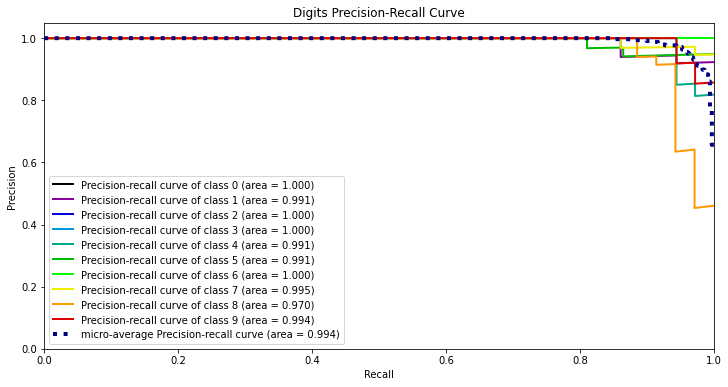

In [24]:
skplt.metrics.plot_precision_recall_curve(Y_digits_test, Y_test_probs,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

## **3.4 -Comparison of all algorithms Accuracy**

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
print(x)
print('\n')

## **3.5 Silhouette Analysis** 


The fourth metric that we'll like to plot is the silhouette analysis plot for clustering machine learning problems. The silhouette analysis lets us know how our clustering algorithm did in clustering various samples. It gives us results in the range of -1 to 1 and if the majority of our values are high towards 1 than it means that our clustering algorithm did well in clustering similar samples together. The silhouette score of the sample is between -1 to 1 where score 1 means that sample if far away from its neighboring clusters and score of -1 means that sample is near to its neighboring cluster than cluster it’s assigned. The value of 0 means that it’s on the boundary between two clusters. We need value for samples on the higher side(>0) to consider our model as a good model.

Scikit-plot provides a method named plot_silhouette as a part of the metrics module to plot the silhouette analysis plot. We need to pass is original data and labels predicted by our clustering algorithm in order to plot silhouette analysis.

Below we are first training our KMeans model on digits train data and then we are passing predicted test labels along with original test data to plot_silhouette method for plotting silhouette analysis.

In [25]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(X_digits_train, Y_digits_train)
cluster_labels = kmeans.predict(X_digits_test)

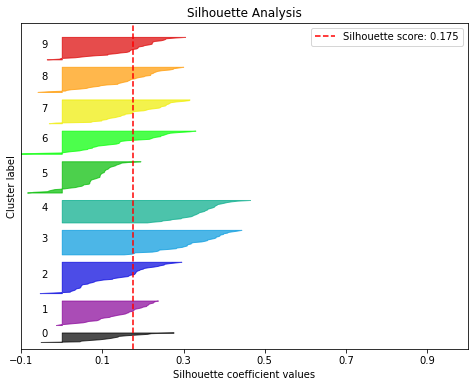

In [26]:
skplt.metrics.plot_silhouette(X_digits_test, cluster_labels,
                              figsize=(8,6));


## **3.6 Calibration Curve (Reliability Curves)** 


The fifth metric that we would like to visualize is the calibration curve also known as reliability curves. Scikit-plot provides a method named plot_calibration_curve() as a part of the estimators module for this purpose.

The calibration curve is suitable for comparing the performance of various models as well as understanding which threshold value for deciding class label is leading to model overfit or underfit. The points in various model lines which are above way above-dashed line have overfitted and one below the dashed line has under fitted. We need a model where points are mostly near the dashed line.

We are first training logistic regression random forest, gradient boosting, and extra trees classifier on cancer train data and then predicting the probability of test data generated by each model. We then pass actual test labels and list of predicted test probabilities by each model to plot_calibration_curve() to plot calibration curve. We also pass a list of classifier names for having legends in the graph.

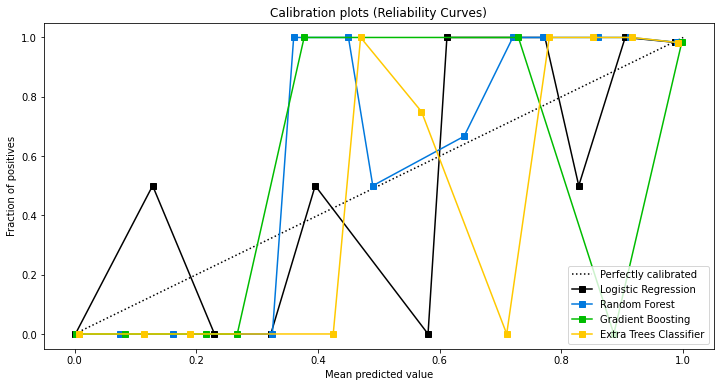

In [27]:
lr_probas = LogisticRegression().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
rf_probas = RandomForestClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
gb_probas = GradientBoostingClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
et_scores = ExtraTreesClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)

probas_list = [lr_probas, rf_probas, gb_probas, et_scores]
clf_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier']
skplt.metrics.plot_calibration_curve(Y_cancer_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

## **3.7 KS Statistics Plot**


The sixth metric that we'll be plotting is the KS statistics plot. Scikit-plot module metrics has method named plot_ks_statistic() for this purpose.

KS Statistics is for binary classification problems only. The KS statistic (Kolmogorov-Smirnov statistic) is the maximum difference between the cumulative true positive and cumulative false-positive rate. It captures the model's power of discriminating positive labels from a negative labels. KS Statistics Plot is for binary classification problems only.

We have first trained random forest classifier on cancer train data. We then passed original cancer test labels and predicted test probabilities by random forest trained model to plot_ks_statistic() in order to plot the KS Statistics chart.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_cancer_train, Y_cancer_train)

In [29]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

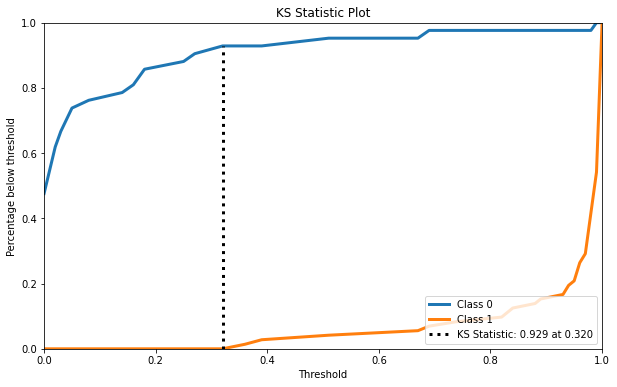

In [30]:
Y_cancer_probas = rf.predict_proba(X_cancer_test)

skplt.metrics.plot_ks_statistic(Y_cancer_test, Y_cancer_probas, figsize=(10,6));

## **3.8 Cumulative Gains Curve** 


Cumulative Gains Curve is the seventh metric that we'll be plotting using scikit-plot. It provides a method named plot_cumulative_gain() as a part of the metrics module for plotting this metric.

Cumulative gains chart tells us the percentage of samples in a given category which were truly predicted by targeting a percentage of the total number of samples. It means when we took that many percentages of samples from the total percentage that we get from the curve for y-axis are labels which were truly guessed by model from a total number of samples of that class in that many samples. The dashed line in the chart is the baseline curve (random guess model) and our model should perform better than it and both class curves should be above it ideally. Cumulative Gains Curve is for binary classification problems only.

We need to pass its original labels of data and predicted probabilities by the trained model in order to plot the cumulative gains curve.

In [ ]:
skplt.metrics.plot_cumulative_gain(Y_cancer_test, Y_cancer_probas, figsize=(10,6));


## **3.9 Lift Curve** 


The eight and last metric that's available with scikit-plot is the Lift curve. Scikit-plot has a method named plot_lift_curve() as a part of the metrics module for plotting this curve.

The lift chart is derived from the cumulative chart by taking a ratio of cumulative gains for each curve to the baseline and showing this ratio on the y-axis. The x-axis has the same meaning as the above chart. The lift curve is for binary classification problems only.

We need to pass its original labels of data and predicted probabilities by the trained model in order to plot the lift curve.

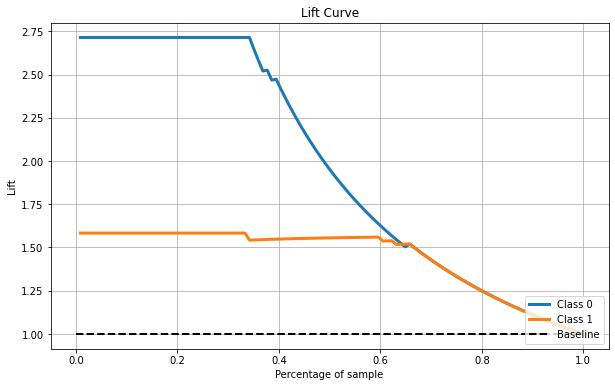

In [32]:
skplt.metrics.plot_lift_curve(Y_cancer_test, Y_cancer_probas, figsize=(10,6));


# **4. Clustering Plot**

## **4.1 Elbow Method** 


The only clustering plot that is available with scikit-plot is the elbow method plot. Scikit-plot provides method named plot_elbow_curve() as a part of cluster module for plotting elbow method curve.

The elbow method is useful in deciding the right number of clusters to be used to divide data into. If you are not aware of a number of clusters beforehand then the elbow method can help you decide a number of clusters to use.

Elbow method plots the number of clusters versus squared error for each sample with that many clusters. The plot generally looks like a human hand and elbow is a place which you select is a number of clusters. It means that more clusters than that are not improving squared errors hence its best number of clusters to choose to divide samples.

We need to pass the clustering algorithm and original data along with an array of cluster sizes to plotting method in order to plot the elbow method curv

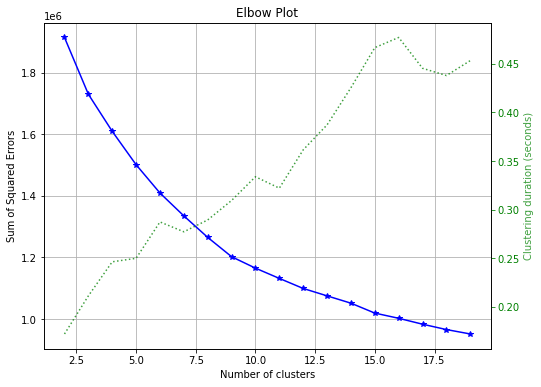

In [33]:
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),
                               X_digits,
                               cluster_ranges=range(2, 20),
                               figsize=(8,6));


# **5. Dimensionality Reduction Plots** 


There are two plots available with dimensionality reduction module of scikit-plot.



## **5.1 PCA Components Explained Variance**

The first dimensionality reduction plot that we'll explore is the PCA component explained variance. Scikit-plot has a method named plot_pca_component_variance as a part of the decomposition module for this.

The PCA components explained variance chart let us know how much of the original data variance is contained within first n components. Below we can see from red dot that 76.2% of digits data variance is present in 11 components. We can see that nearly 45 components have nearly a 100% variance of data. We can decide from this graph how much the percentage of original data's variance is enough for better model performance and take components accordingly which will result in reducing the dimension of original data.

We need to pass trained PCA on the dataset to method plot_pca_component_variance() in order to plot this chart.

In [34]:
pca = PCA(random_state=1)
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));


## **5.2 2-D Projection**


The second plot for dimensionality reduction that we'll plot is a 2D projection of data transformed through PCA. Scikit-plot provides method named plot_pca_2d_projection() as a part of decomposition module for this purpose.

We need to pass it trained PCA model along with dataset and its labels for plotting purposes.

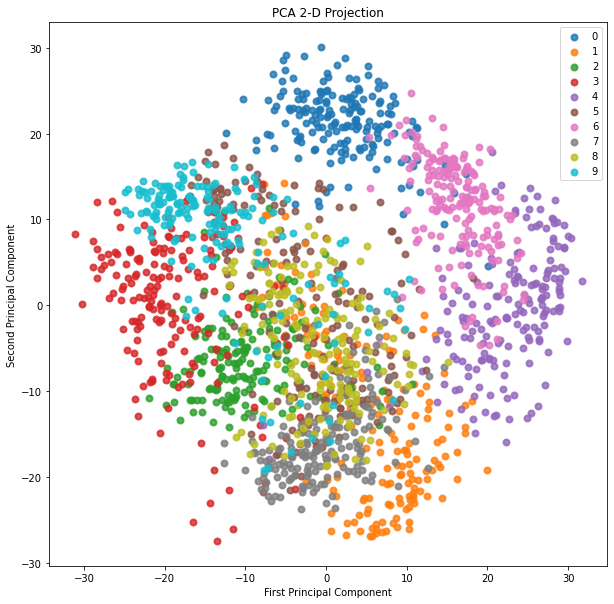

In [36]:
skplt.decomposition.plot_pca_2d_projection(pca, X_digits, Y_digits,
                                           figsize=(10,10),
                                           cmap="tab10");

# **References**

[Scikit-Plot: Visualizing Machine Learning Algorithm Results & Performance](https://coderzcolumn.com/tutorials/machine-learning/scikit-plot-visualizing-machine-learning-algorithm-results-and-performance)